# Import statements

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [39]:
train_df=pd.read_csv('train.csv')

In [40]:
train_df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [41]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Histogram

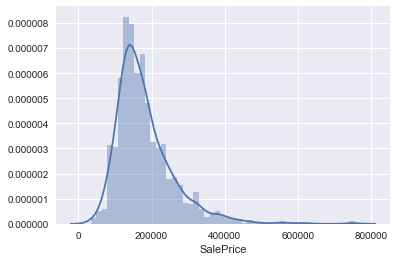

In [42]:
sns.distplot(train_df['SalePrice']);

# Skewness and Kurtosis

In [43]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Scatter plot grlivarea/saleprice

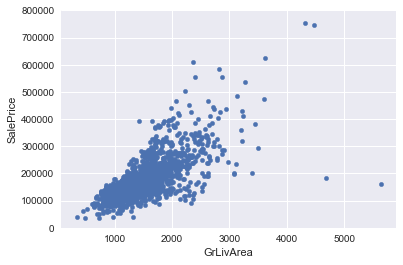

In [44]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Scatter plot totalbsmtsf/saleprice

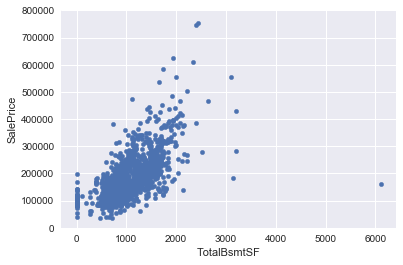

In [45]:
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Box plot overallqual/saleprice

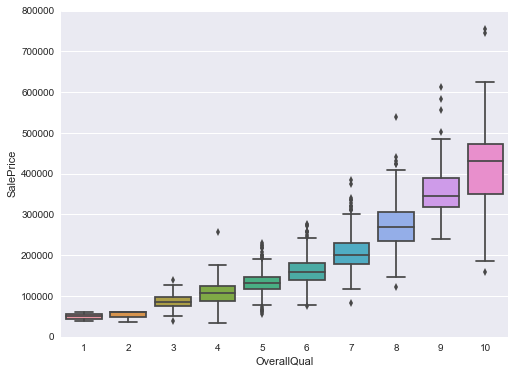

In [46]:
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

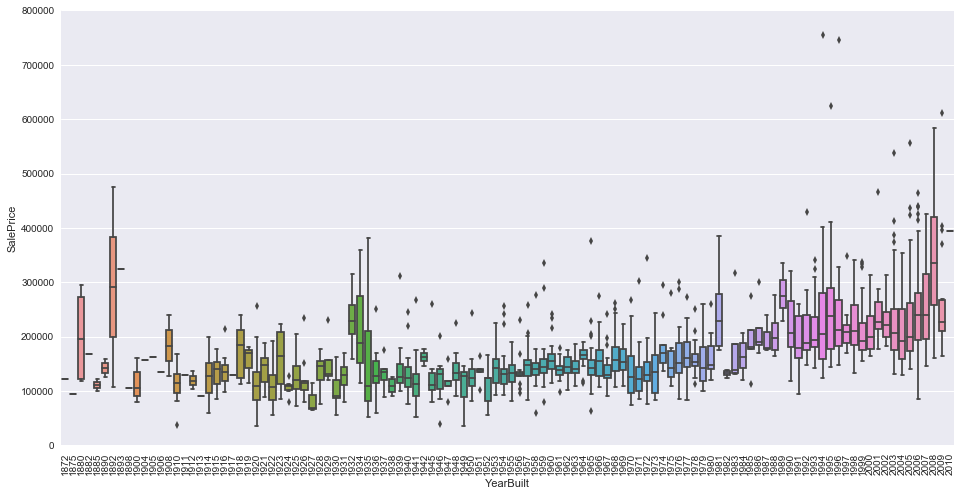

In [47]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


# Correlation matrix

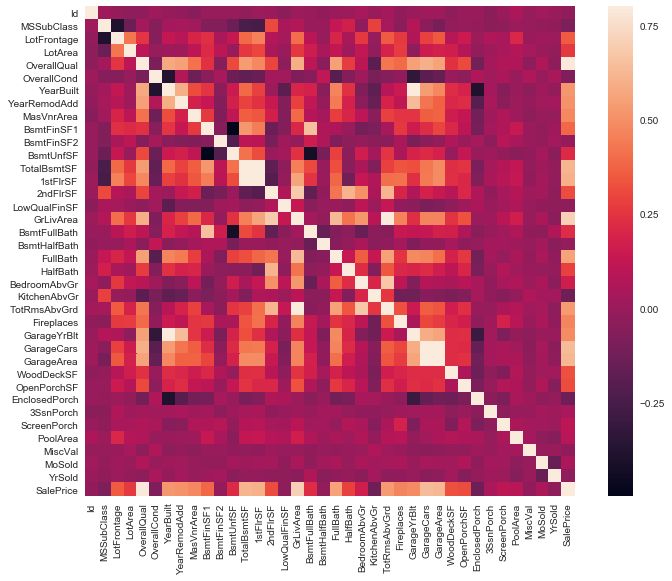

In [48]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Saleprice correlation matrix

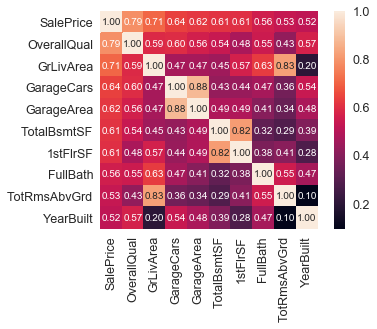

In [49]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Scatterplot

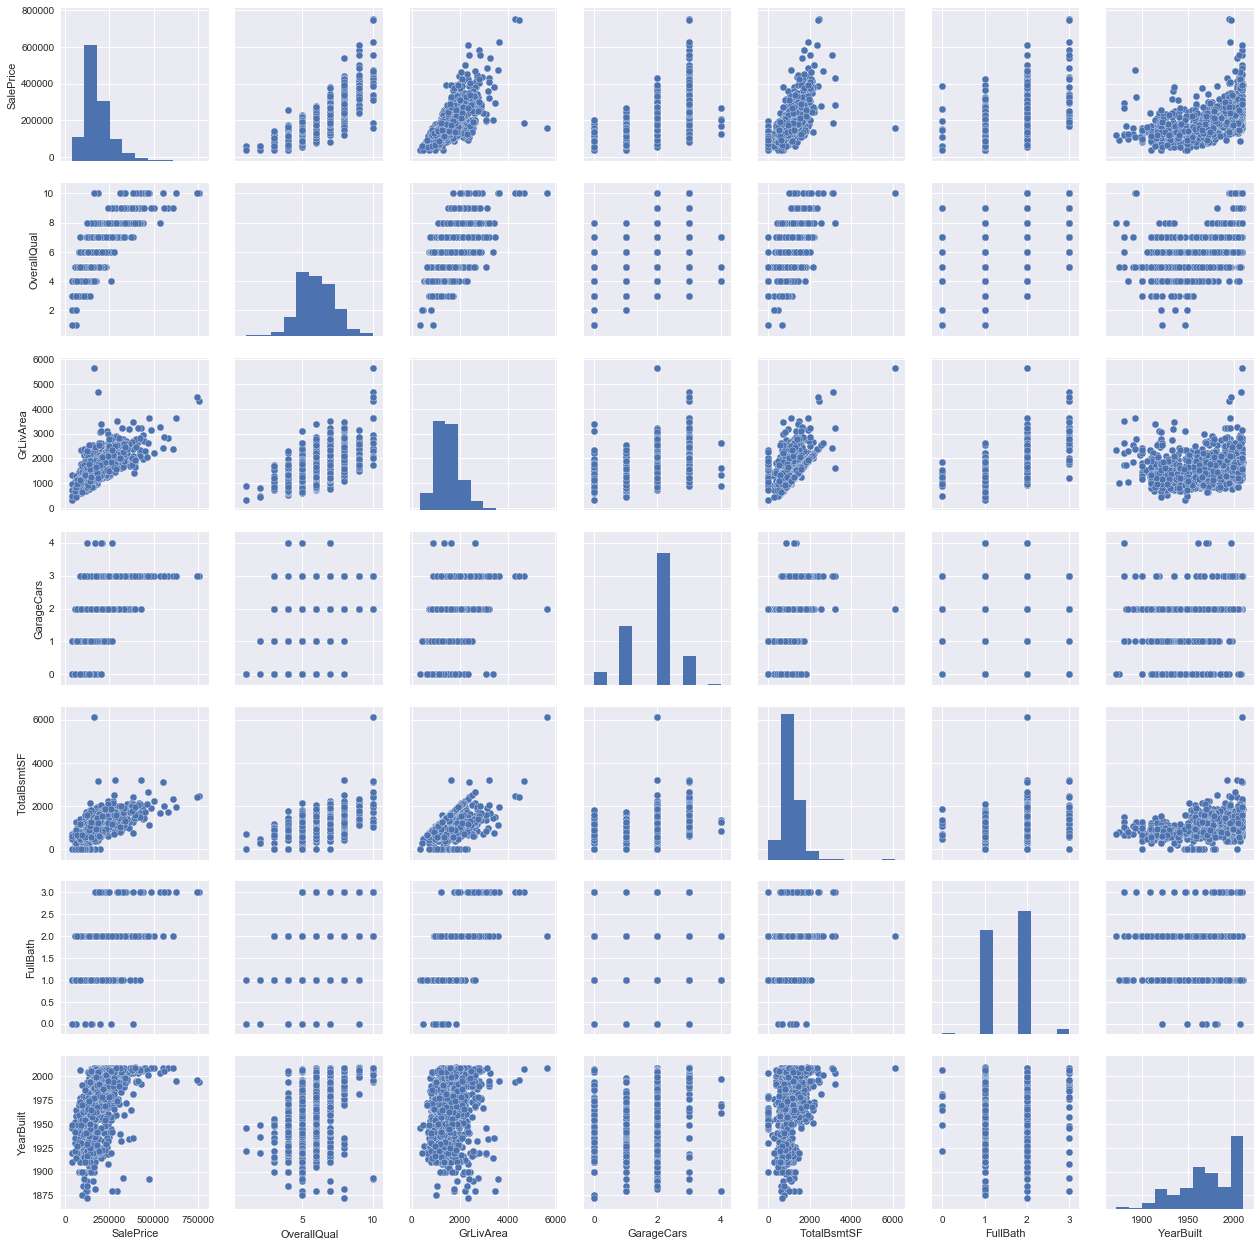

In [50]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

# Missing data

In [51]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# Dealing with missing data

In [52]:
train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
train_df.isnull().sum().max() #just checking that there's no missing data missing...

0

# Standardizing data

In [53]:
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


# Bivariate analysis saleprice/grlivarea

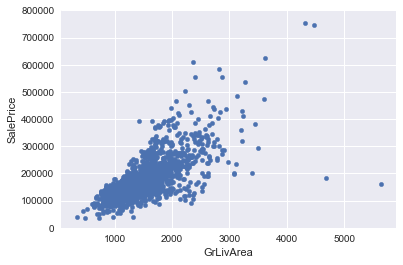

In [54]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [55]:
#deleting points
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [56]:
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

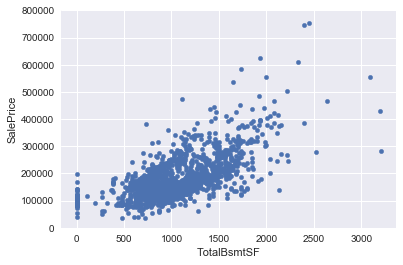

In [57]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

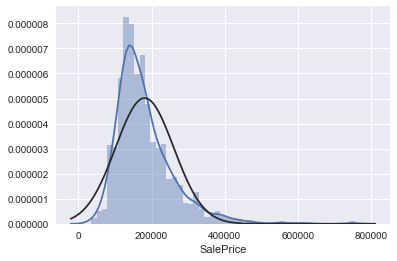

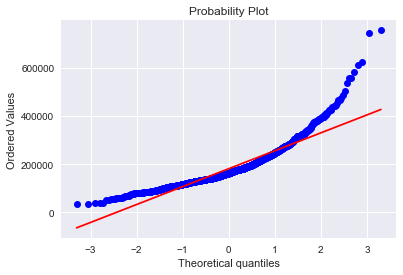

In [58]:
#histogram and normal probability plot
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [59]:
#applying log transformation
train_df['SalePrice'] = np.log(train_df['SalePrice'])

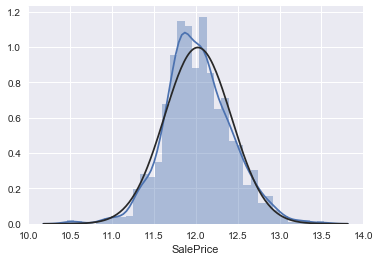

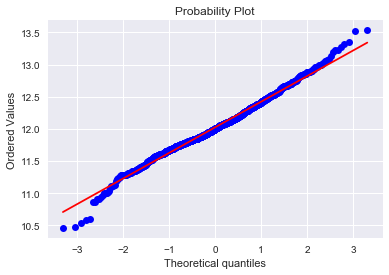

In [60]:
#transformed histogram and normal probability plot
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

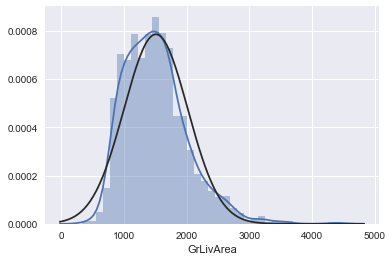

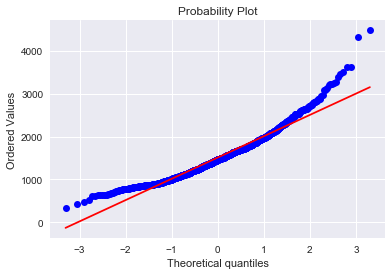

In [61]:
#histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

In [62]:
#data transformation
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])

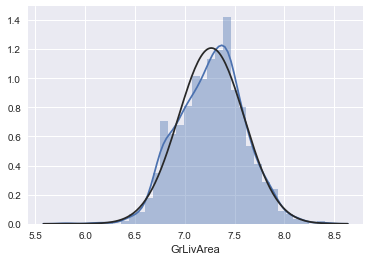

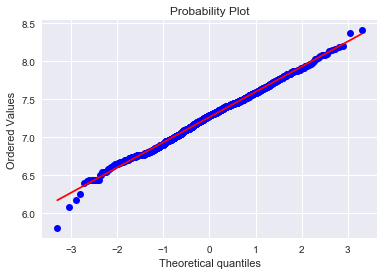

In [63]:
#transformed histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

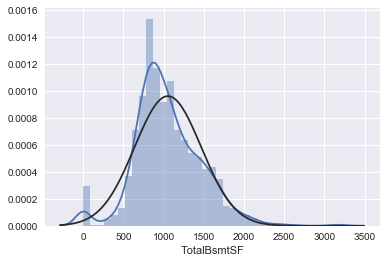

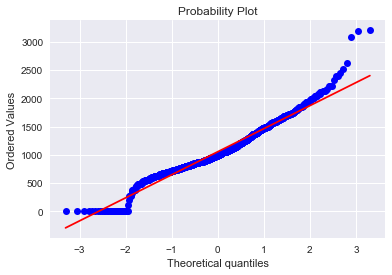

In [64]:
#histogram and normal probability plot
sns.distplot(train_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot=plt)

In [65]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index=train_df.index)
train_df['HasBsmt'] = 0 
train_df.loc[train_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [66]:
#transform data
train_df.loc[train_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

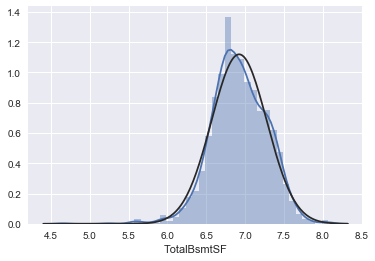

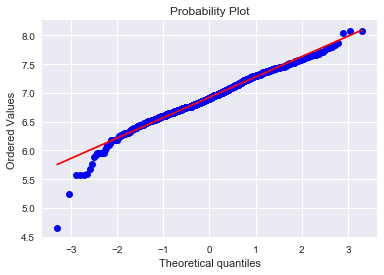

In [67]:
#histogram and normal probability plot
sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

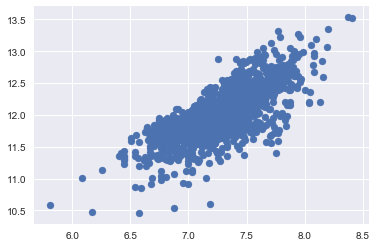

In [68]:
#scatter plot
plt.scatter(train_df['GrLivArea'], train_df['SalePrice']);

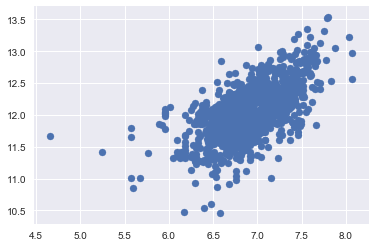

In [69]:
#scatter plot
plt.scatter(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], train_df[train_df['TotalBsmtSF']>0]['SalePrice']);

In [70]:
#convert categorical variable into dummy
train_df = pd.get_dummies(train_df)

In [71]:
train_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [73]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
X = train_df.drop('SalePrice',axis=1)
y = train_df['SalePrice']

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)